In [1]:
import pandas as pd
import numpy as np

In [2]:
sol=pd.read_csv('SMILES-DATA- NEW.csv')
sol

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0
...,...,...
420,CS(=O)(=O)NCC1COCCN1C(=O)C=C,1
421,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C,1
422,C[C@@H](NC(=O)C=C)C=1C=NC=CN1,1
423,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C,1


In [3]:
sol.SMILES

0             CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1                  CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2        CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3      COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4                   C=CC(=O)NCC1COC=2C=CC=CC2O1
                         ...                   
420                CS(=O)(=O)NCC1COCCN1C(=O)C=C
421           COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
422               C[C@@H](NC(=O)C=C)C=1C=NC=CN1
423        CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C
424               C=CC(=O)N1CCC=2C1=CC=CC2C3CC3
Name: SMILES, Length: 425, dtype: object

In [4]:
sol.SMILES[8]

'C=CC(=O)NC=1C=CC=C(C1)N2CCCS2(=O)=O'

In [5]:
from rdkit import Chem
#from rdkit.Chem import MACCSkeys
from rdkit.Chem import rdFMCS

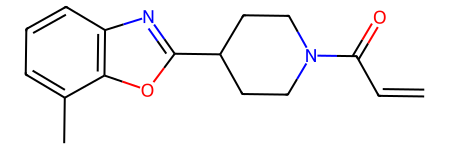

In [6]:
Chem.MolFromSmiles(sol.SMILES[2]) 

In [7]:
for smiles in sol.SMILES[:1]:
    mol = Chem.MolFromSmiles(smiles)
    if mol is not None:
        # Display or process the molecular structure as needed
        # For example, you can save the structure as an image
        img = Chem.Draw.MolToImage(mol)
        img.show()
        print(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=300x300 at 0x1AB175E8310>


In [8]:
mol_list=[]
for element in sol.SMILES:
    mol=Chem.MolFromSmiles(element)
    #print(mol)
    mol_list.append(mol)

In [9]:
len(mol_list)

425

In [10]:
mol_list[:5]

In [11]:
sol.head()

,SMILES,RESULT
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C,0
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C,0
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C,0
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1,0
4,C=CC(=O)NCC1COC=2C=CC=CC2O1,0


In [12]:
import numpy as np
#from rdkit.Chem import Descriptors

In [13]:
#X=sol.drop(['type','results'],axis='columns')
X=sol.drop(['RESULT'],axis='columns')
Y=sol['RESULT']


In [14]:
X

,SMILES
0,CC=1N=C(C)N(N1)C2CCCN(C2)C(=O)C=C
1,CN(CC1=NC=2CCCCC2S1)C(=O)C=C
2,CC=1C=CC=C2N=C(OC12)C3CCN(CC3)C(=O)C=C
3,COC=1C=CC=2NC=C(C3=CCN(CC3)C(=O)C=C)C2C1
4,C=CC(=O)NCC1COC=2C=CC=CC2O1
...,...
420,CS(=O)(=O)NCC1COCCN1C(=O)C=C
421,COC=1C=CC=C(C1)C2CN(CCO2)C(=O)C=C
422,C[C@@H](NC(=O)C=C)C=1C=NC=CN1
423,CC(C)N1C=C(N=N1)C2=CCCN(CC2)C(=O)C=C


In [15]:
Y.value_counts()

1    213
0    212
Name: RESULT, dtype: int64

In [16]:
from rdkit import Chem
from rdkit.Chem import MACCSkeys

#Generate MACCS fingerprint
from rdkit.Chem import MACCSkeys
fp = MACCSkeys.GenMACCSKeys(mol)
fp

In [17]:
# Obtain the fingerprint as a binary string or array

fp_string = fp.ToBitString()
fp_array = np.array(list(fp_string), dtype=int)
fp_string

'00000000000000000000001000000000001000000000000000000000000000100000000000010000000101000000100010011100010000110000011001100000100000010100000010011000011010100111110'

In [18]:
fp_array

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [19]:
len(fp_string)

167

In [20]:
fp_array.shape

(167,)

In [21]:
# Assuming `sol` is your DataFrame with the 'SMILES' column

# Define a function to convert SMILES strings to fingerprints
def smiles_to_fingerprint(smiles):
    mol = Chem.MolFromSmiles(smiles)
    fp = MACCSkeys.GenMACCSKeys(mol)
    fingerprint = np.array(list(fp.ToBitString()), dtype=int)
    return fingerprint

# Apply the function to the 'SMILES' column and create a new column for the fingerprints
sol['Fingerprint'] = sol['SMILES'].apply(smiles_to_fingerprint)

# Access the 'SMILES' and 'Fingerprint' columns
X = sol[['Fingerprint']]
X

sol['Fingerprint_Sum'] = sol['Fingerprint'].apply(lambda x: x.sum())

# Calculate the average of the 'Fingerprint_Sum' column
average_fingerprint_sum = sol['Fingerprint_Sum'].mean()

print(sol['Fingerprint_Sum'])
print(average_fingerprint_sum)

0      48
1      43
2      44
3      52
4      38
       ..
420    67
421    46
422    23
423    47
424    33
Name: Fingerprint_Sum, Length: 425, dtype: int32
39.315294117647056


In [22]:
#sol['Fingerprint_Sum'].hist()

<Axes: >

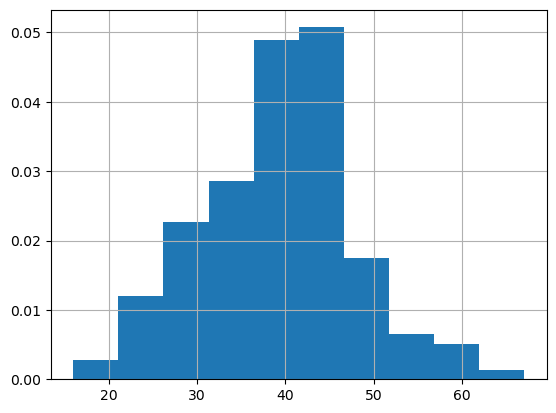

In [23]:
sol['Fingerprint_Sum'].hist(density=1)

In [24]:
#sol2['Fingerprint_Sum'].hist(density=1)

In [25]:
fingerprints = sol['Fingerprint'] 
fingerprints_df = pd.DataFrame( fingerprints.tolist())
print(fingerprints_df)
X=fingerprints_df
X

     0    1    2    3    4    5    6    7    8    9    ...  157  158  159  \
0      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
1      0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
2      0    0    0    0    0    0    0    0    0    0  ...    0    1    1   
3      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
4      0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
420    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
421    0    0    0    0    0    0    0    0    0    0  ...    1    1    1   
422    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
423    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   
424    0    0    0    0    0    0    0    0    0    0  ...    0    1    0   

     160  161  162  163  164  165  166  
0      1    1    1    1    1    1 

,0,1,2,3,4,5,6,7,8,9,...,157,158,159,160,161,162,163,164,165,166
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,1,1,1,1,1,1,1,0
3,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
4,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,0,1,1,1,0
421,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,0
422,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,1,1,1,0
423,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,1,1,0,1,1,0


In [26]:
Y=sol[['RESULT']]
Y

,RESULT
0,0
1,0
2,0
3,0
4,0
...,...
420,1
421,1
422,1
423,1


In [27]:
Y.value_counts()

RESULT
1         213
0         212
dtype: int64

In [28]:
# oversampling  SMOTE

#from imblearn.over_sampling import SMOTE

#smote = SMOTE(sampling_strategy='minority')
#X_sm, Y_sm = smote.fit_resample(X,Y)

#Y_sm.value_counts()

In [29]:
#Y_sm.to_csv('data-1111.csv', index=False)

In [30]:
from sklearn.model_selection import train_test_split

#X_train, X_test, Y_train, Y_test = train_test_split(X_sm, Y_sm, test_size=0.2, random_state=42)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=42)


In [31]:
X_train.shape

(340, 167)

In [32]:
X_test.shape

(85, 167)

In [197]:

################################### GridsearchCV  ######################################
################################### GridsearchCV  ######################################
################################### GridsearchCV  ######################################


from sklearn.model_selection import GridSearchCV, KFold
from sklearn.svm import SVC
import sklearn
import numpy as np
import joblib

# Assume X_sm and Y_sm are your features and labels respectively

# Parameter grid for GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],  # 'log_loss' is not directly supported in sklearn's DecisionTree
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],  # None means unlimited
    #'min_samples_split': [2, 5, 10],
    #'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],  # None means use all features
    'class_weight': [None, 'balanced'],
    'random_state': [42]  # Ensure reproducibility
}
   

# Create an SVM model with verbose output during model fitting (verbose=1 for some output, higher for more)
clf = DecisionTreeClassifier()
svm_model=clf

# Define 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Configure GridSearchCV with increased verbosity for more detailed search output
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='precision', cv=kf, verbose=3, n_jobs=-1)

# Perform the search
grid_search.fit(X, Y)

# Results
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Best model (retrained on the entire dataset)
best_model = grid_search.best_estimator_

# Save the retrained model
joblib.dump(best_model, 'svm_model_final.joblib')

Fitting 10 folds for each of 96 candidates, totalling 960 fits
Best parameters found:  {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'random_state': 42, 'splitter': 'random'}
Best cross-validation accuracy: 0.653


['svm_model_final.joblib']

In [34]:
##################################KFOLD##################################################
##################################KFOLD##################################################
##################################KFOLD##################################################

from sklearn.model_selection import cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import joblib
from sklearn.metrics import recall_score, f1_score, confusion_matrix

# Assume X_sm and Y_sm are your features and labels respectively

# Create an SVM model
#svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')

# Create an c4.5 decision tree
clf = DecisionTreeClassifier(
    class_weight='balanced',
    criterion= 'entropy',
    max_depth= None,
    random_state= 42,
    splitter= 'best')

svm_model=clf

# Define 10-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform 10-fold cross-validation
#accuracy_scores = cross_val_score(svm_model, X_sm, Y_sm, cv=kf, scoring='precision')
accuracy_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

# Perform 10-fold cross-validation for precision
precision_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='precision')

recall_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='recall')
f1_scores = cross_val_score(svm_model, X, Y, cv=kf, scoring='f1')


# Print the accuracy for each fold
print("Accuracy scores for each fold:")
for i, score in enumerate(accuracy_scores, 1):
    print(f"Fold {i}: {score:.3f}")

# Print the average accuracy across all folds
print(f"\nAverage accuracy: {np.mean(accuracy_scores):.3f}")
print(f"\nAverage precision: {np.mean(precision_scores):.3f}")

print(f"Average Recall: {np.mean(recall_scores):.3f}")
print(f"Average F1 Score: {np.mean(f1_scores):.3f}")
# If satisfied with the average accuracy, you might choose to retrain the model on the entire dataset
#svm_model.fit(X_sm, Y_sm)
svm_model.fit(X, Y)

# Save the retrained model
joblib.dump(svm_model, 'svm_model_final.joblib')


Accuracy scores for each fold:
Fold 1: 0.590
Fold 2: 0.648
Fold 3: 0.595
Fold 4: 0.585
Fold 5: 0.595

Average accuracy: 0.603

Average precision: 0.603
Average Recall: 0.622
Average F1 Score: 0.610


['svm_model_final.joblib']